In [1]:
# -- Bibliotecas Gráficas

import matplotlib.pyplot as plt
import seaborn as sns

# -- Bibliotecas de ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# -- Bibliotecas de Dados
import pandas as pd
import sidetable as stb
import numpy as np

# Leitura dos dados

In [2]:
df = pd.read_excel('golf_df.xlsx')
df.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [3]:
# Analisando categorias
df.value_counts()

clima     temp  umidade  vento  jogar
overcast  cool  normal   yes    yes      1
          hot   high     no     yes      1
                normal   no     yes      1
          mild  high     yes    yes      1
rainy     cool  normal   no     yes      1
                         yes    no       1
          mild  high     no     yes      1
                         yes    no       1
                normal   no     yes      1
sunny     cool  normal   no     yes      1
          hot   high     no     no       1
                         yes    no       1
          mild  high     no     no       1
                normal   yes    yes      1
dtype: int64

In [4]:
#Descrevendo a tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   clima    14 non-null     object
 1   temp     14 non-null     object
 2   umidade  14 non-null     object
 3   vento    14 non-null     object
 4   jogar    14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [5]:
#Demonstrando valores nulos
df.stb.missing()

,missing,total,percent
clima,0,14,0.0
temp,0,14,0.0
umidade,0,14,0.0
vento,0,14,0.0
jogar,0,14,0.0


In [6]:
#Convertendo colunas em categorias
df[['clima', 'temp', 'umidade', 'vento', 'jogar']] = df[['clima', 'temp', 'umidade', 'vento', 'jogar']].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   clima    14 non-null     category
 1   temp     14 non-null     category
 2   umidade  14 non-null     category
 3   vento    14 non-null     category
 4   jogar    14 non-null     category
dtypes: category(5)
memory usage: 834.0 bytes


In [8]:
for coluna in df.columns:
  print(df[coluna].unique())

['sunny', 'overcast', 'rainy']
Categories (3, object): ['overcast', 'rainy', 'sunny']
['hot', 'mild', 'cool']
Categories (3, object): ['cool', 'hot', 'mild']
['high', 'normal']
Categories (2, object): ['high', 'normal']
['no', 'yes']
Categories (2, object): ['no', 'yes']
['no', 'yes']
Categories (2, object): ['no', 'yes']


In [9]:
# Armazenando as colunas categorias em uma variável
df_catColumns = df[['clima', 'temp','umidade','vento']]
df_catColumns.columns

Index(['clima', 'temp', 'umidade', 'vento'], dtype='object')

In [10]:
# Aplicando LabelEncoder() nas colunas categoricas
label = LabelEncoder()

for coluna in df_catColumns.columns:
  df[coluna] = label.fit_transform(df[coluna])

In [11]:
df.head()

,clima,temp,umidade,vento,jogar
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes


In [12]:
X = df[['clima', 'temp', 'umidade', 'vento']]
y = df['jogar']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X_train

,clima,temp,umidade,vento
2,0,1,0,0
12,0,1,1,0
5,1,0,1,1
4,1,0,1,0
11,0,2,0,1
8,2,0,1,0
13,1,2,0,1
0,2,1,0,0
6,0,0,1,1
10,2,2,1,1


In [15]:
y_train

2     yes
12    yes
5      no
4     yes
11    yes
8     yes
13     no
0      no
6     yes
10    yes
Name: jogar, dtype: category
Categories (2, object): ['no', 'yes']

In [16]:
#Train the model
model = LogisticRegression()
model.fit(X, y) #Training the model

LogisticRegression()

In [17]:
#Test the model
previsao = model.predict(X)

In [18]:
X['previsão'] = previsao
X

,clima,temp,umidade,vento,previsão
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,1,0,1,1,yes
6,0,0,1,1,yes
7,2,2,0,0,no
8,2,0,1,0,yes
9,1,2,1,0,yes


In [19]:
y = pd.DataFrame(y)
y

,jogar
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [20]:
X["real"] = y["jogar"]
X

,clima,temp,umidade,vento,previsão,real
0,2,1,0,0,no,no
1,2,1,0,1,no,no
2,0,1,0,0,yes,yes
3,1,2,0,0,yes,yes
4,1,0,1,0,yes,yes
5,1,0,1,1,yes,no
6,0,0,1,1,yes,yes
7,2,2,0,0,no,no
8,2,0,1,0,yes,yes
9,1,2,1,0,yes,yes


# Arvores de Decisão

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df = pd.read_excel('golf_df.xlsx')
df

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes
5,rainy,cool,normal,yes,no
6,overcast,cool,normal,yes,yes
7,sunny,mild,high,no,no
8,sunny,cool,normal,no,yes
9,rainy,mild,normal,no,yes


In [25]:
X = pd.get_dummies(df[['clima', 'temp', 'umidade', 'vento']])
X

,clima_overcast,clima_rainy,clima_sunny,temp_cool,temp_hot,temp_mild,umidade_high,umidade_normal,vento_no,vento_yes
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [27]:
y = pd.DataFrame(y)
y

,jogar
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [28]:
from sklearn import tree

In [30]:
arvore = tree.DecisionTreeClassifier()

In [32]:
modelo = arvore.fit(X,y)
modelo

DecisionTreeClassifier()

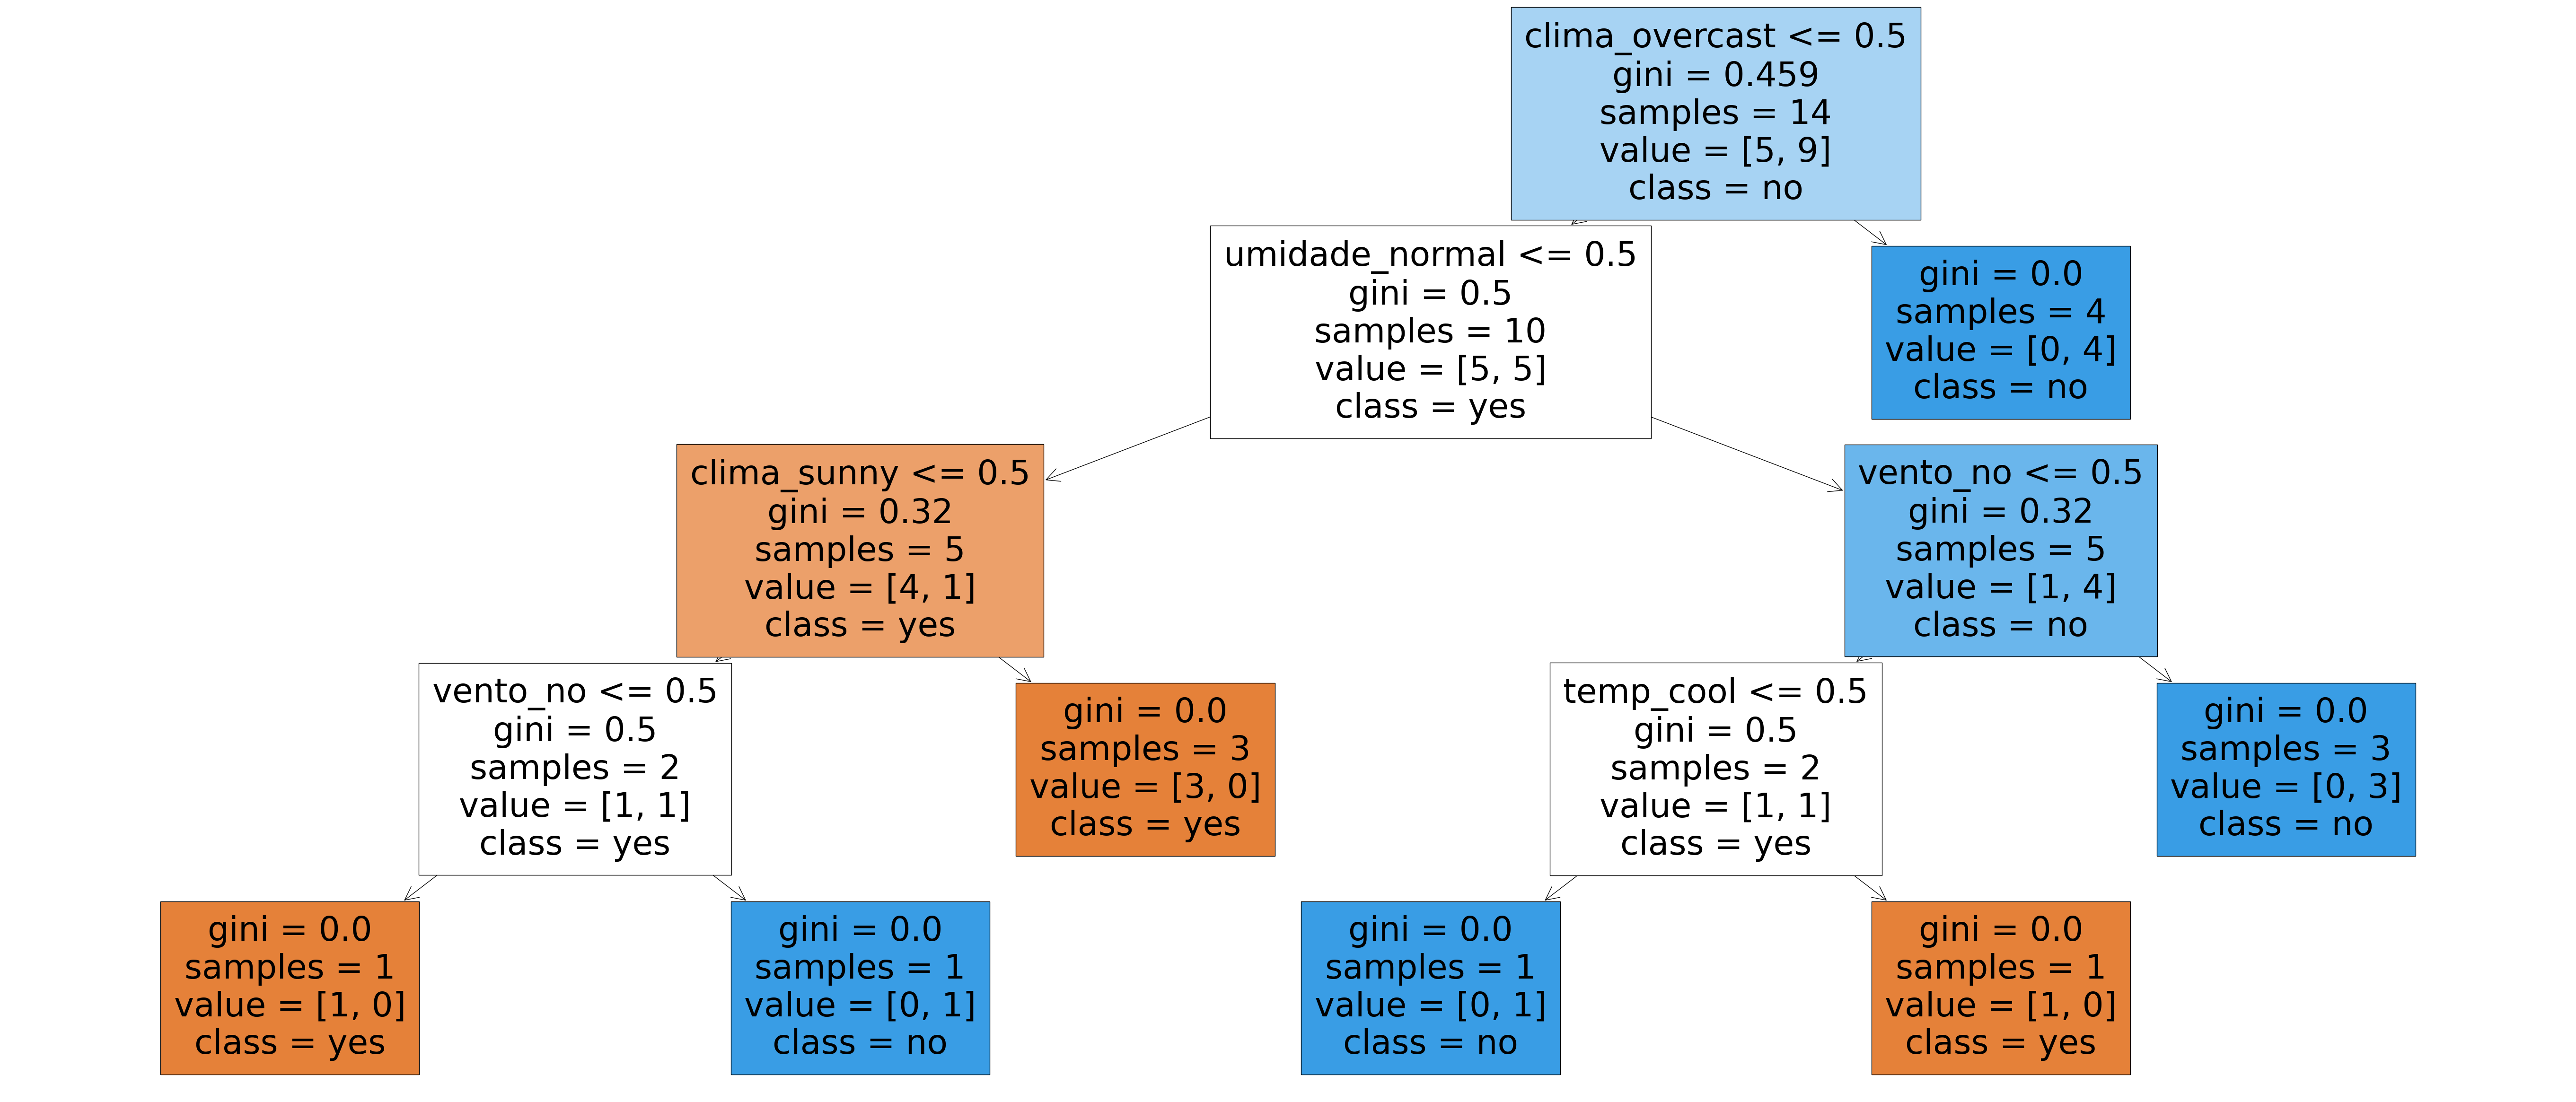

In [34]:
fig = plt.figure(figsize=(70,30))

fig = tree.plot_tree(
    modelo,
    feature_names=X.columns, 
    class_names=['yes', 'no'],
    filled = True)


# Exercício Decision Tree

In [37]:
df = pd.read_excel('vendas.xlsx')
df

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No
5,2.5,13,No,No
6,1.5,15,No,Yes
7,2.5,15,No,No
8,2.5,15,No,No
9,1.5,27,No,No


In [40]:
df.test = label.fit_transform(df.test)
df

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,0,Yes
1,2.5,11,0,No
2,2.5,11,0,No
3,1.5,13,0,Yes
4,2.5,13,0,No
5,2.5,13,0,No
6,1.5,15,0,Yes
7,2.5,15,0,No
8,2.5,15,0,No
9,1.5,27,0,No


In [47]:
X = df[['media_rating',	'media_pedidos'	,'test']]
y = pd.DataFrame(df.cliente_comprou)

In [49]:
modelo = arvore.fit(X,y)
modelo

DecisionTreeClassifier()

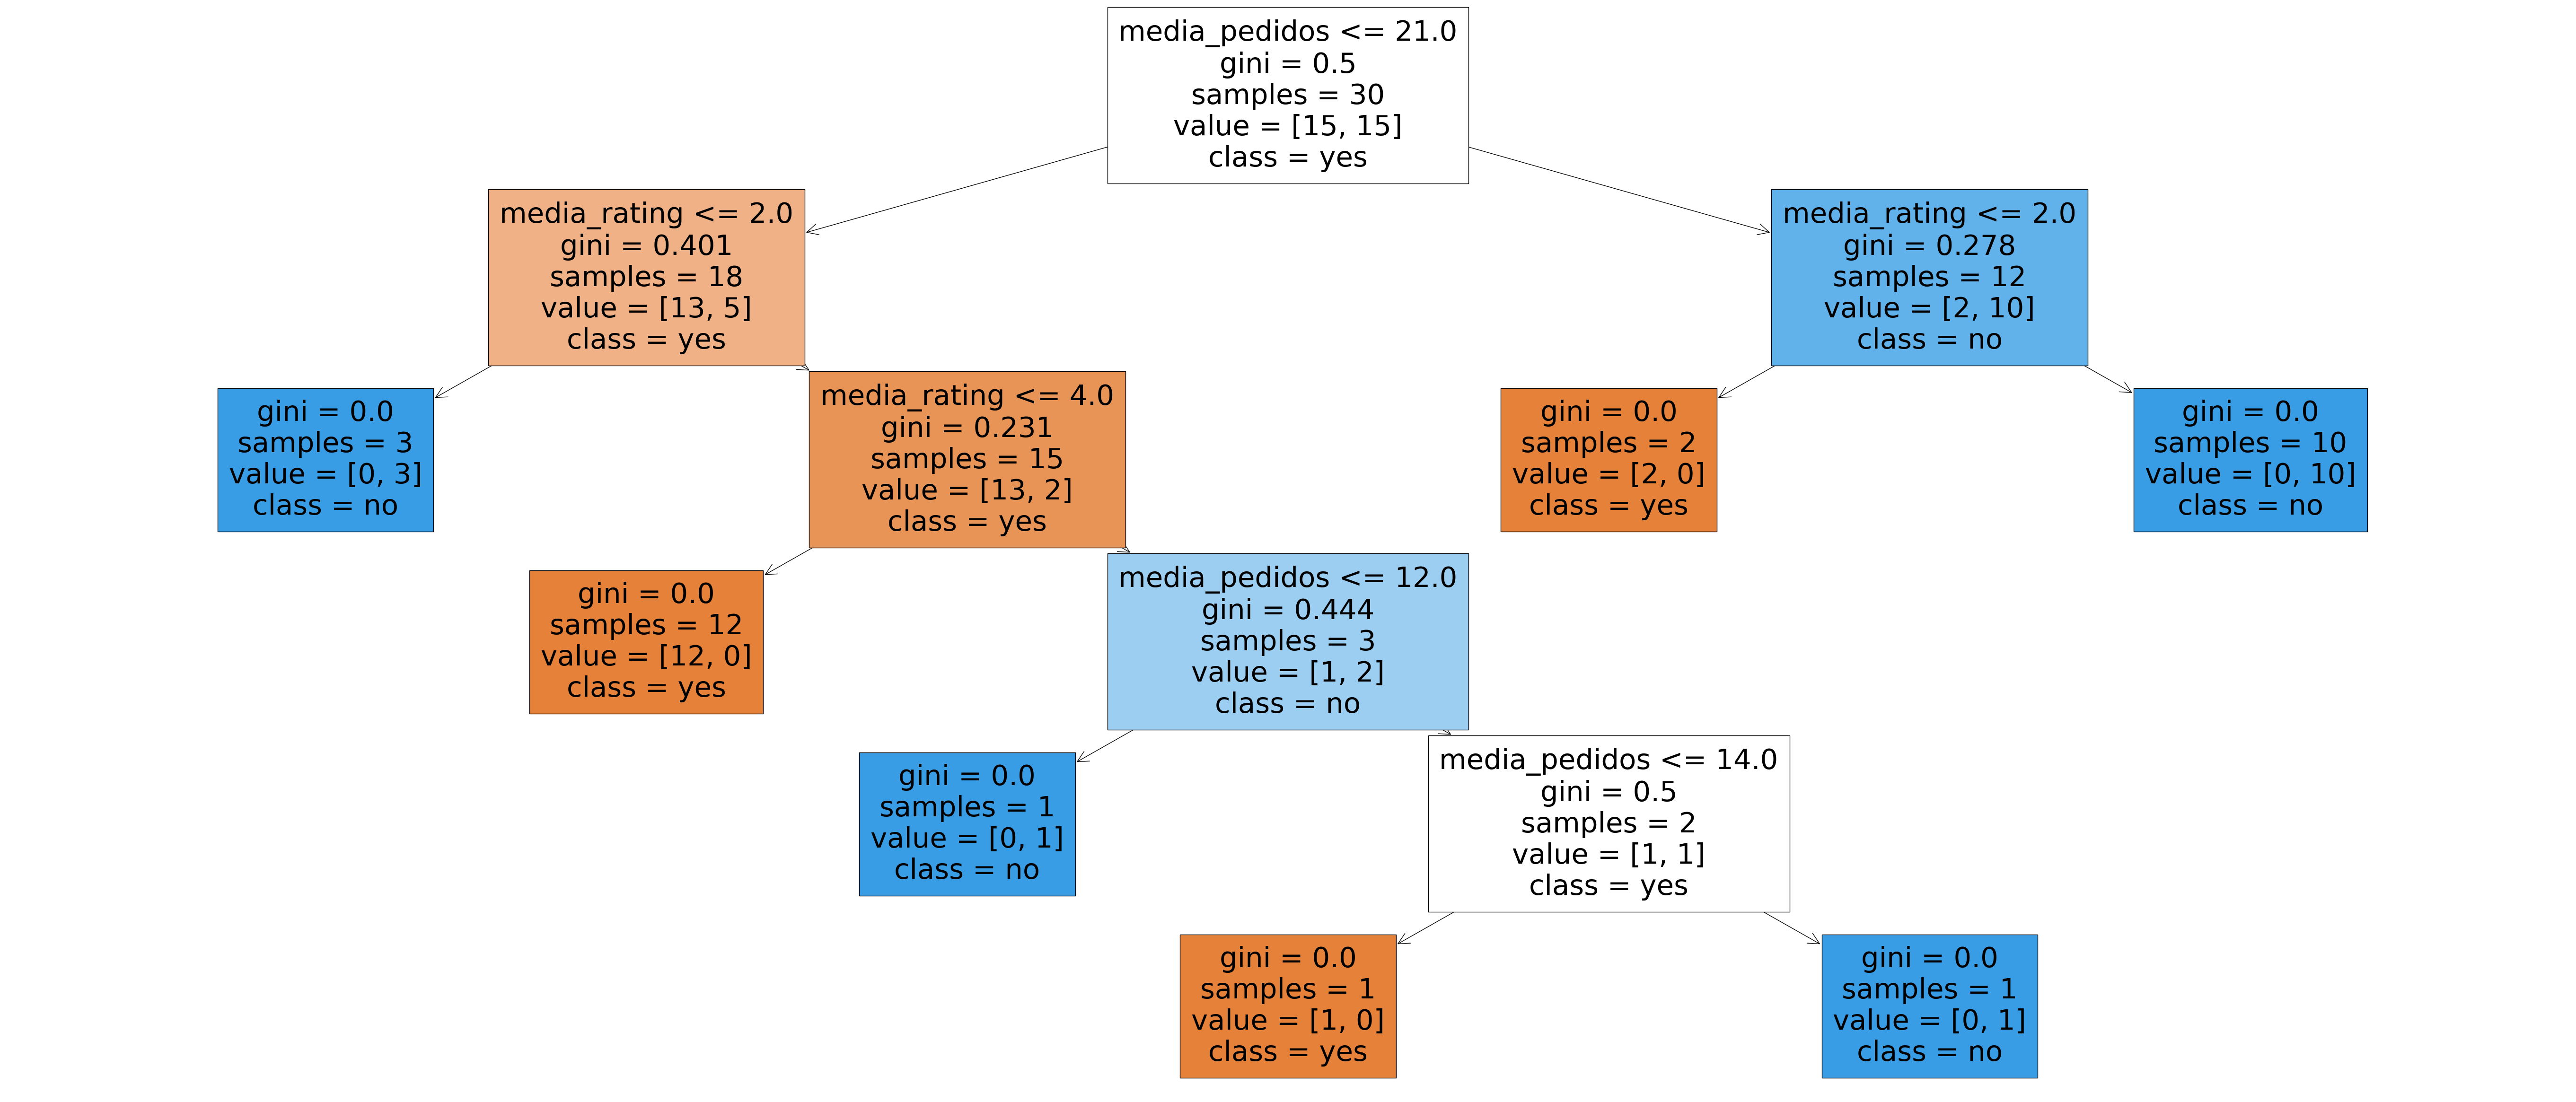

In [50]:
fig = plt.figure(figsize=(70,30))

fig = tree.plot_tree(
    modelo,
    feature_names=X.columns, 
    class_names=['yes', 'no'],
    filled = True)